# Black Friday Sales Prediction

In [1]:
#Load Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics

In [2]:
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

In [3]:
#Load train and test files 
data = pd.read_csv("C:\\Users\\RDX\\Desktop\\Varun\\train.csv")
test = pd.read_csv("C:\\Users\\RDX\\Desktop\\Varun\\test.csv")

**Step 1 : Explore train and test datasets**

In [4]:
#First look at train
data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
306529,1005240,P00040442,F,26-35,0,C,1,1,5,14.0,NaN,8790
20616,1003267,P00265242,M,26-35,4,A,2,0,5,8.0,NaN,8895
394797,1000791,P00173842,M,36-45,7,B,1,0,1,2.0,15.0,12004
109196,1004802,P00344242,M,55+,1,B,3,1,8,10.0,NaN,7903
210654,1002484,P00171642,M,46-50,5,B,0,0,5,8.0,14.0,5391


In [5]:
#First look at test
test.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
105803,1001015,P00086242,M,36-45,3,A,4+,1,10,NaN,NaN
213762,1005585,P00305242,M,26-35,4,A,4+,0,1,5.0,NaN
32723,1002331,P00010842,M,55+,1,A,1,1,8,16.0,NaN
107972,1004290,P00058042,M,26-35,17,C,1,0,8,16.0,NaN
188523,1002478,P00071442,M,51-55,1,A,0,0,15,17.0,NaN


In [6]:
#Shape of train and test
print(data.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [7]:
#Check Missing values in train
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
#Check Missing values in test
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Product_Category_2 & Product_Category_3 have many missing vaules in train & test

In [9]:
#Lets describe train
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
#Lets describe test
test.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [11]:
#Lets concatenate train & test
df=pd.concat([data,test])
df.shape 

(783667, 12)

**Step 2 : Data cleaning**

In [12]:
#Explore numerical variable - Stay_In_Current_City_Years
df.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [13]:
#Lets remove '+' symbol and convert to object
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x: x.replace('+', '')
                                if isinstance(x, str) else x).astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('object')
df.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

**Step 3 : Exploratory Data Analysis (EDA)**

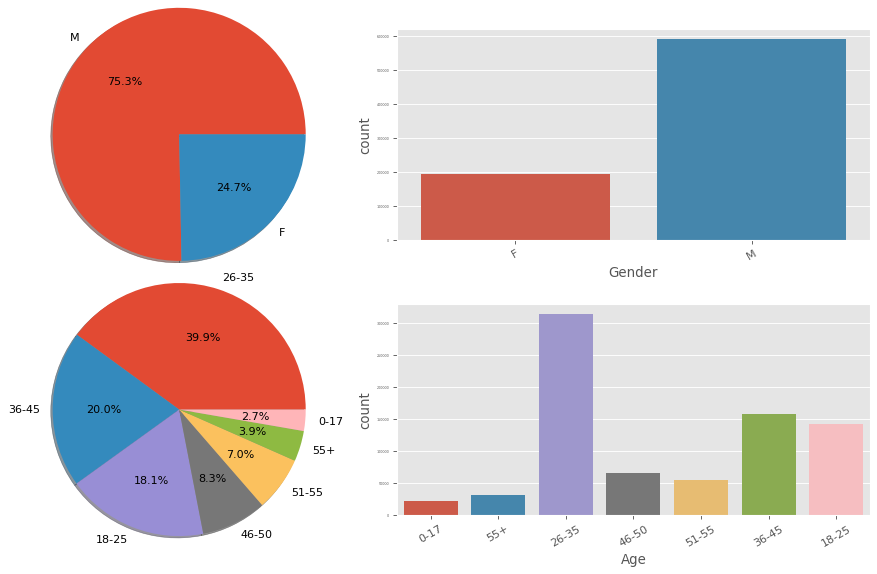

In [14]:
#Explore categorical variables - Gender & Age
cat_col_1 = [
 'Gender',
 'Age',
 ]
count = 1
for cols in cat_col_1:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.5,textprops={'fontsize': 10} )
    count +=1
    plt.subplot(2, 2, count)
    plt.tight_layout()
    sns.countplot(cols, data=df)
    fig=plt.gcf()
    fig.set_size_inches(12,7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=3)
    plt.xticks(rotation=30)
    count+=1

Gender : 75.3% is male Vs 24.7% female

Age : Maximum buyers(39.9%) belong to age group 26-35 and minimum (2.7%) belong to 0-17 age group

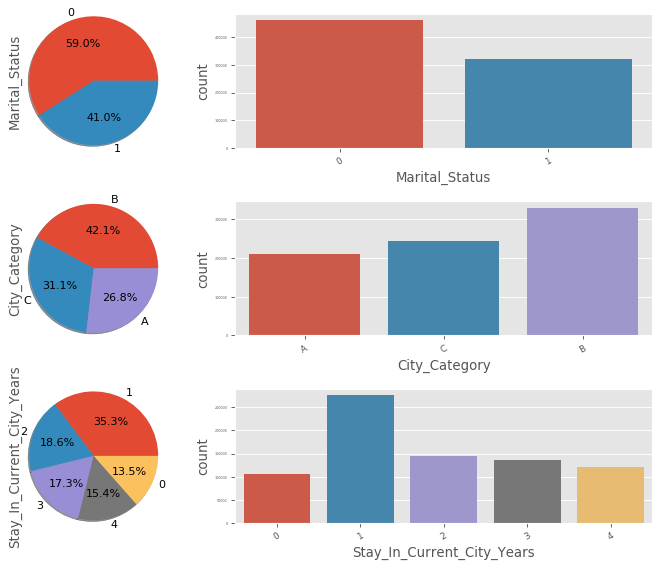

In [15]:
#Explore categorical variables - Marital_Status, City_Category & Stay_In_Current_City_Years
cat_col_2 = [
 'Marital_Status',
 'City_Category',
 'Stay_In_Current_City_Years',
 ]
count = 1
for cols in cat_col_2:
    plt.subplot(3, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.2,textprops={'fontsize': 10} )
    count +=1
    plt.subplot(3, 2, count)
    plt.tight_layout()
    sns.countplot(cols, data=df)
    fig=plt.gcf()
    fig.set_size_inches(10,7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=3)
    plt.xticks(rotation=30)
    count+=1 

Marital_status : 59% Not married Vs 41% married

City_Category : Maximum buyers belong to City_Category=B (42.1%) and min to City_Category=A (26.8%)

Stay_In_Current_City_Years : Maximum buyers have stayed in city for 1 year and minimum buyers for 0 years (i.e. recently moved)

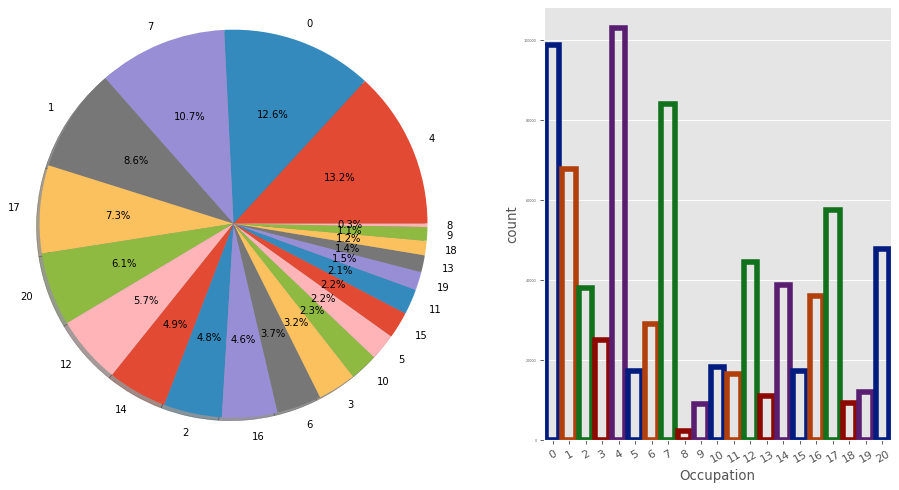

In [16]:
#Explore categorical variable - Occupation
cat_col_3 = ['Occupation',]
count = 1
for cols in cat_col_3:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.4,textprops={'fontsize': 9} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    #df.Occupation.value_counts().sort_values().plot(kind = 'bar')
    sns.countplot(x="Occupation", data=df,facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 5))
    fig=plt.gcf()
    fig.set_size_inches(12,7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=3)
    plt.xticks(rotation=30)
    count+=1

Occupation : Maximum buyers belong to Occupation category = 4 and minimum buyers belong to category = 8

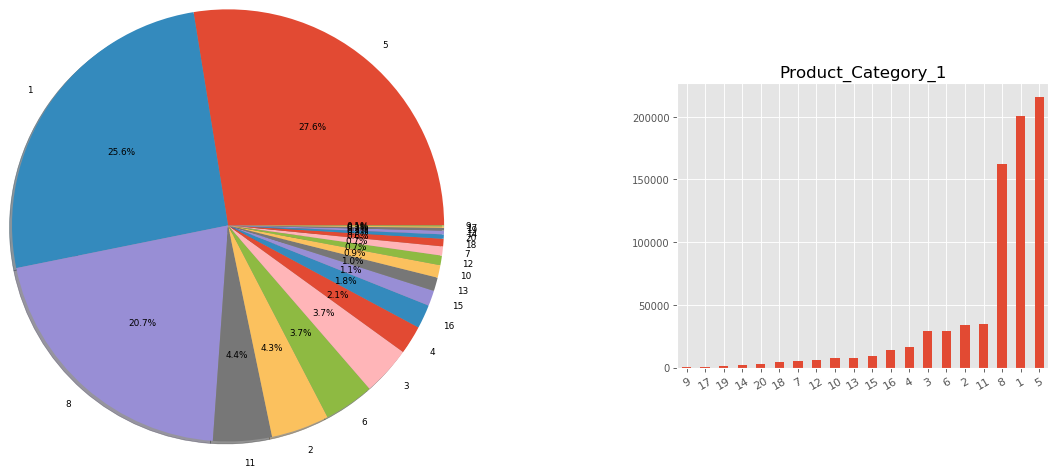

In [17]:
#Explore categorical variable - Product_Category_1
cat_col_4 = ['Product_Category_1',]
count = 1
for cols in cat_col_4:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('ggplot')
    df.Product_Category_1.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_1", fontsize=15) 
    fig.set_size_inches(15,7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

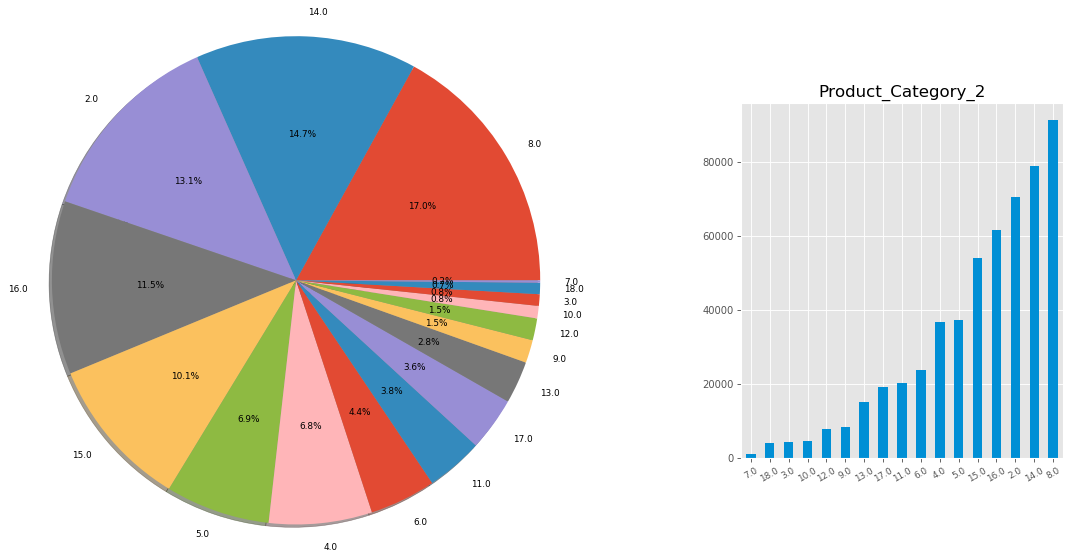

In [18]:
#Explore categorical variable - Product_Category_2
cat_col_5 = ['Product_Category_2',]
count = 1
for cols in cat_col_5:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df.Product_Category_2.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_2", fontsize=15) 
    fig.set_size_inches(15,10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

For Product_Category_2 : eight is highest and 7.0 is lowest

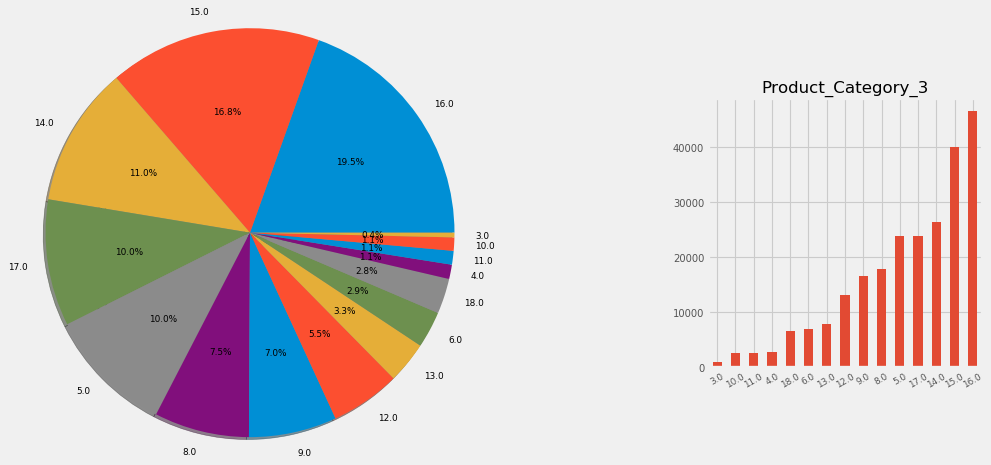

In [19]:
#Explore categorical variable - Product_Category_3
cat_col_6 = ['Product_Category_3',]
count = 1
for cols in cat_col_6:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('ggplot')
    df.Product_Category_3.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_3", fontsize=15) 
    fig.set_size_inches(15,10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

For Product_Category_3 16.0 is max Vs 3.0 is min

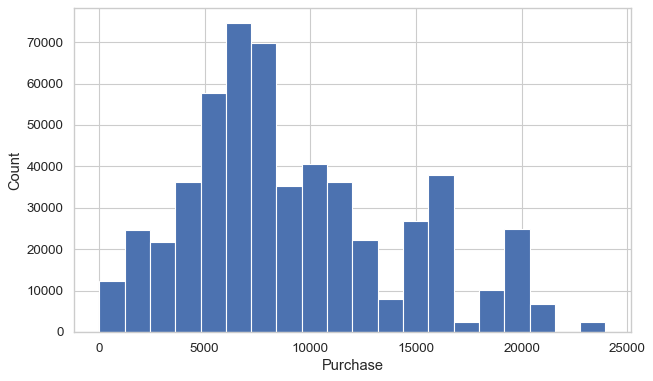

In [20]:
#Lets explore numerical variables - User_ID , Product_ID & Purchase
# Lets see how Purchase analysis looks like
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Purchase'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Purchase', ylabel='Count');

Maximum frequency (>50k times)can be seen betwee Purchase value (5000-8600)

Few amounts as high as 23961 is also seen

Min value is 12


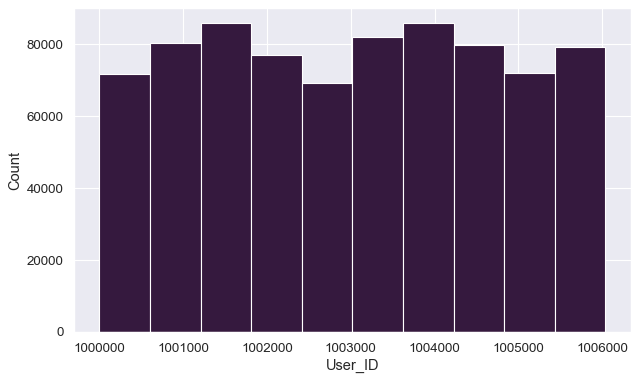

In [21]:
# Lets see how User_ID analysis looks like
sns.set(style='darkgrid', palette="rocket", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['User_ID'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='User_ID', ylabel='Count');

Frequency distribution looks almost similar for all types of users

In [22]:
#variables - Product_ID 
#Lets emove P and convert product id to a integer
df['Product_ID'] = df['Product_ID'].apply(lambda x: x.replace('P', '')
                                if isinstance(x, str) else x).astype(int)

df['Product_ID'] = df['Product_ID'].astype('int')

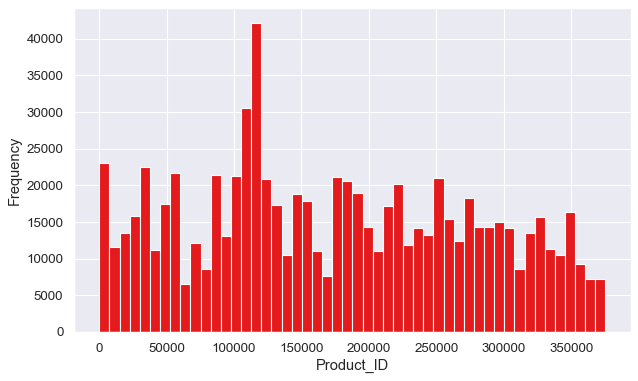

In [23]:
# Lets see how Product_ID analysis looks like
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Product_ID'], norm_hist=False, kde=False, bins=50, hist_kws={"alpha": 1}
).set(xlabel='Product_ID', ylabel='Frequency');


Maximum frequency of product id can be seen from 110000 to 120000

**Lets see relationship between categorical and numerical variables**

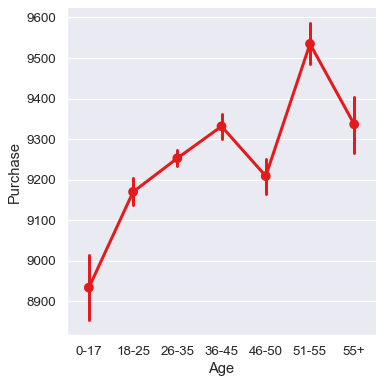

In [24]:
#Variable - Age Vs Purchase
#Catplot Age+Purchase
sns.catplot(x='Age',y='Purchase',kind='point',data=df, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],)

Age group 51-55 is the highest purchase group with value 9520+ as median

Age group 0-17 is the lowest purchase group with value 8920+ as median as they are non-adults and need to depend upon parents for buying

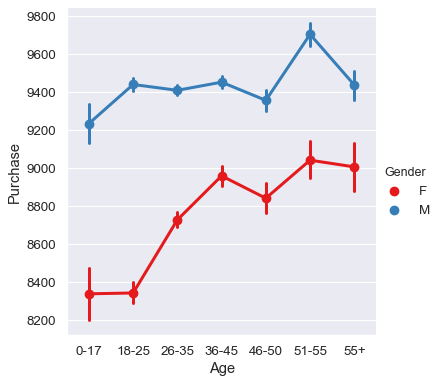

In [25]:
#Variable - Age Vs Purchase with hue = Gender
#Catplot Age+Purchase
sns.catplot(x='Age',y='Purchase',kind='point',data=df, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],hue='Gender')

Male have higher buying than female across all age categories

51-55 age group is highest in bothh Genders

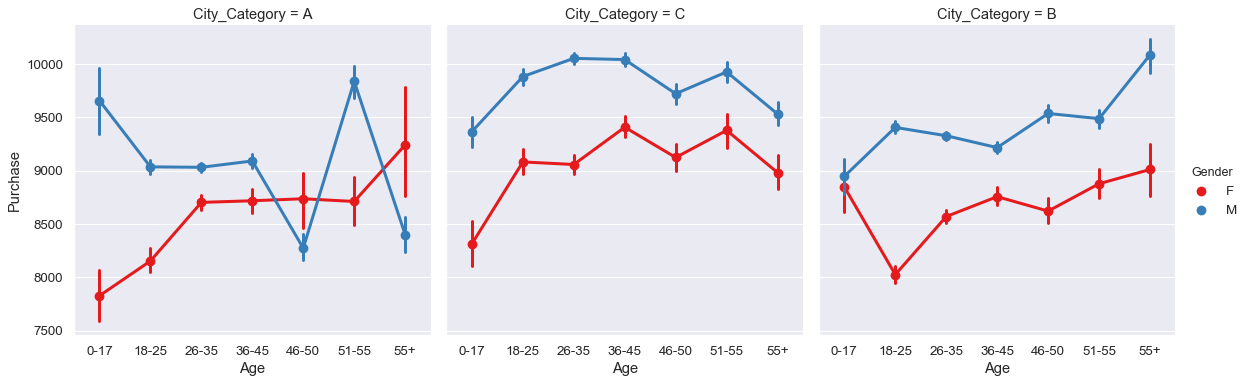

In [26]:
#Catplot Age+Purchase+City_Category+Gender
sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='City_Category',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

In City category B & C : Probabiity of purchases is more for male Gender Vs Female

For City category A : For age group 45-50 & 55+, female buyers are more than male buyers, for other age groups male are more than female

In City category B : Probabiity of purchases is more for age group 0-17 than 18-25, 26-35, 36-45 & 46-50 which is interesting

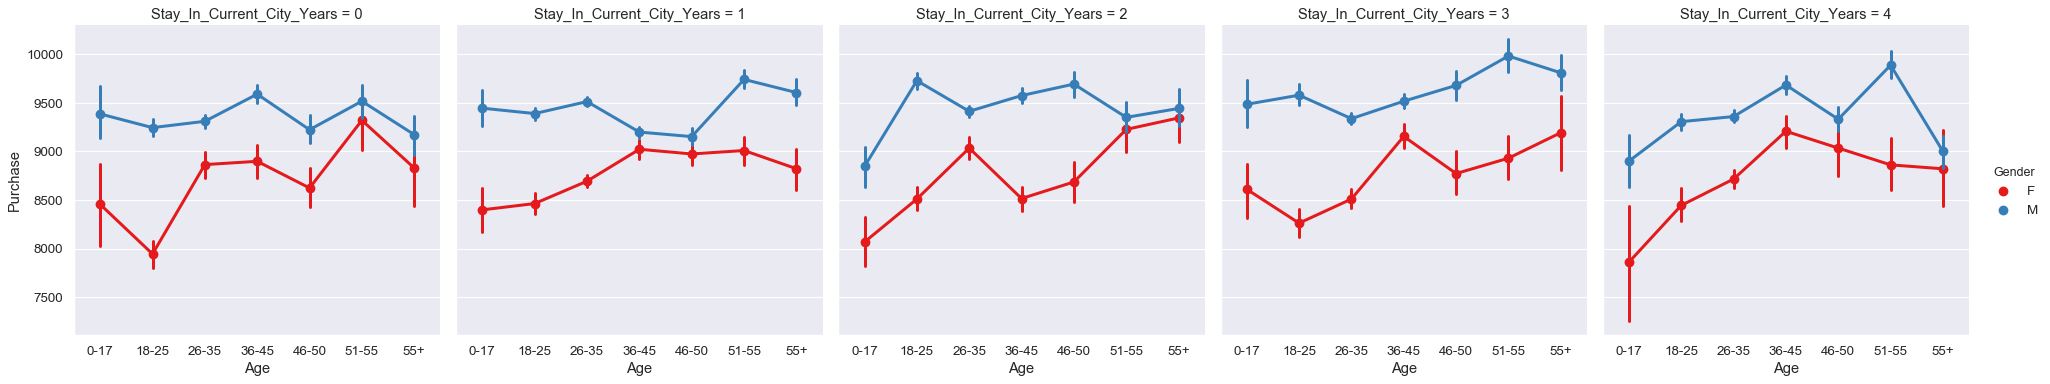

In [27]:
#Catplot Age+Purchase+Stay_In_Current_City_Years+Gender
sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='Stay_In_Current_City_Years',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

Irrespective of stay in current city, male purchasing is more than female

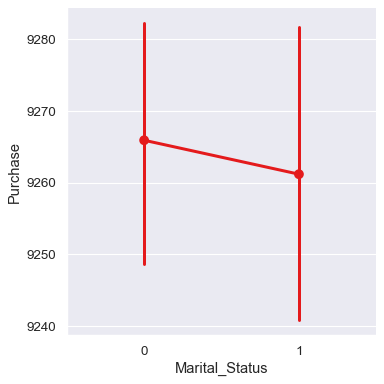

In [28]:
#Catplot Marital_Status+Purchase
sns.catplot(x='Marital_Status',y='Purchase',kind='point',data=df)

Unmarried people buy more than married people

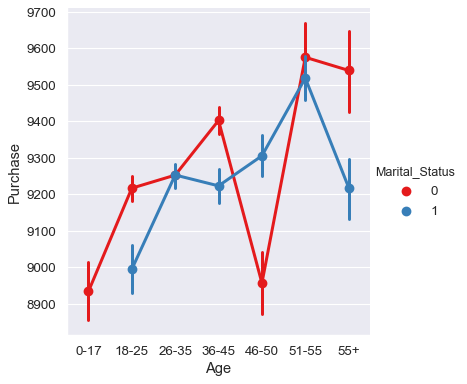

In [29]:
#Catplot Age+Purchase+Marital_Status
sns.catplot(x='Age',y='Purchase',kind='point',data=df,hue='Marital_Status', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

age group 46-50 and married spent more than non-married

In all other age groups , unmarried people spent more than married

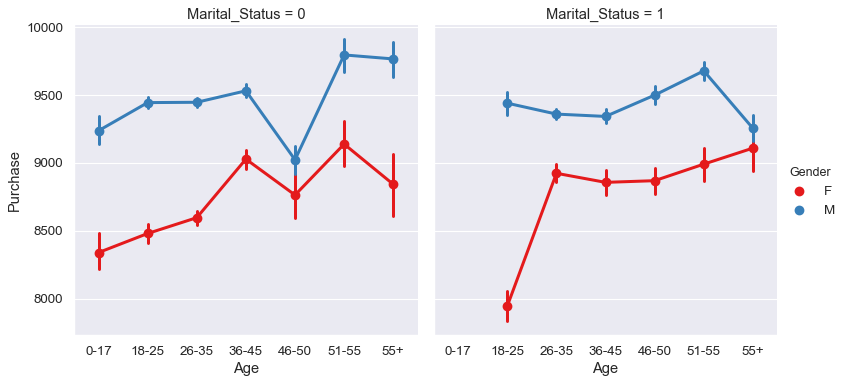

In [30]:
#Catplot Age+Purchase+Marital_Status+Gender
sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='Marital_Status',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

Irrespective of marital status, male purchasing is more than female across all age groups

age group 0-17 is not married because of obvious reasons

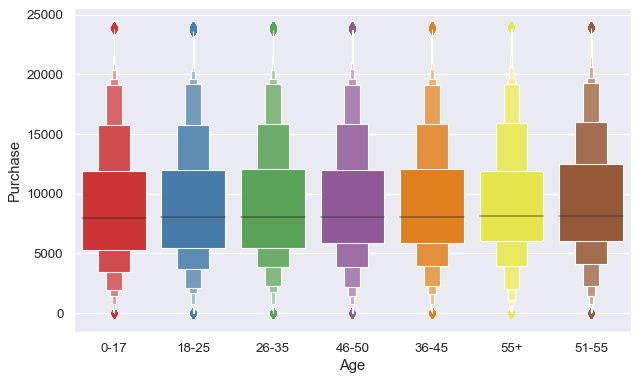

In [31]:
# Boxplot of Age Vs Purchase in ascending order of purchase
sorted_nb = df.groupby(['Age'])['Purchase'].median().sort_values()
sns.boxenplot(x=df['Age'], y=df['Purchase'], order=list(sorted_nb.index))

we can see again that 51-55 is having highest mean of the Purchase amount and is the highest spender

In [32]:
# fill the missing data
df['Product_Category_2'].fillna(method='bfill', inplace=True)
df['Product_Category_3'].fillna(method='bfill', inplace=True)

In [33]:
df['Product_Category_2'].fillna(df['Product_Category_2'].value_counts().index[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].value_counts().index[0], inplace=True)

In [34]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [35]:
#Convert Product_Category_1, Product_Category_2 & Product_Category_3 from object to numerical int
df['Product_Category_1']  = df['Product_Category_1'].astype('int')
df['Product_Category_2']  = df['Product_Category_2'].astype('int')
df['Product_Category_3']  = df['Product_Category_3'].astype('int')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int32  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int32  
 9   Product_Category_2          783667 non-null  int32  
 10  Product_Category_3          783667 non-null  int32  
 11  Purchase                    550068 non-null  float64
dtypes: float64(1), int32(4), int64(3), object(4)
memory usage: 81.9+ MB


In [37]:
#Creating train and test set
df_backup = df.copy()

In [38]:
#Converting categorocal variables to dummy variables 
df=pd.get_dummies(df,drop_first=True)

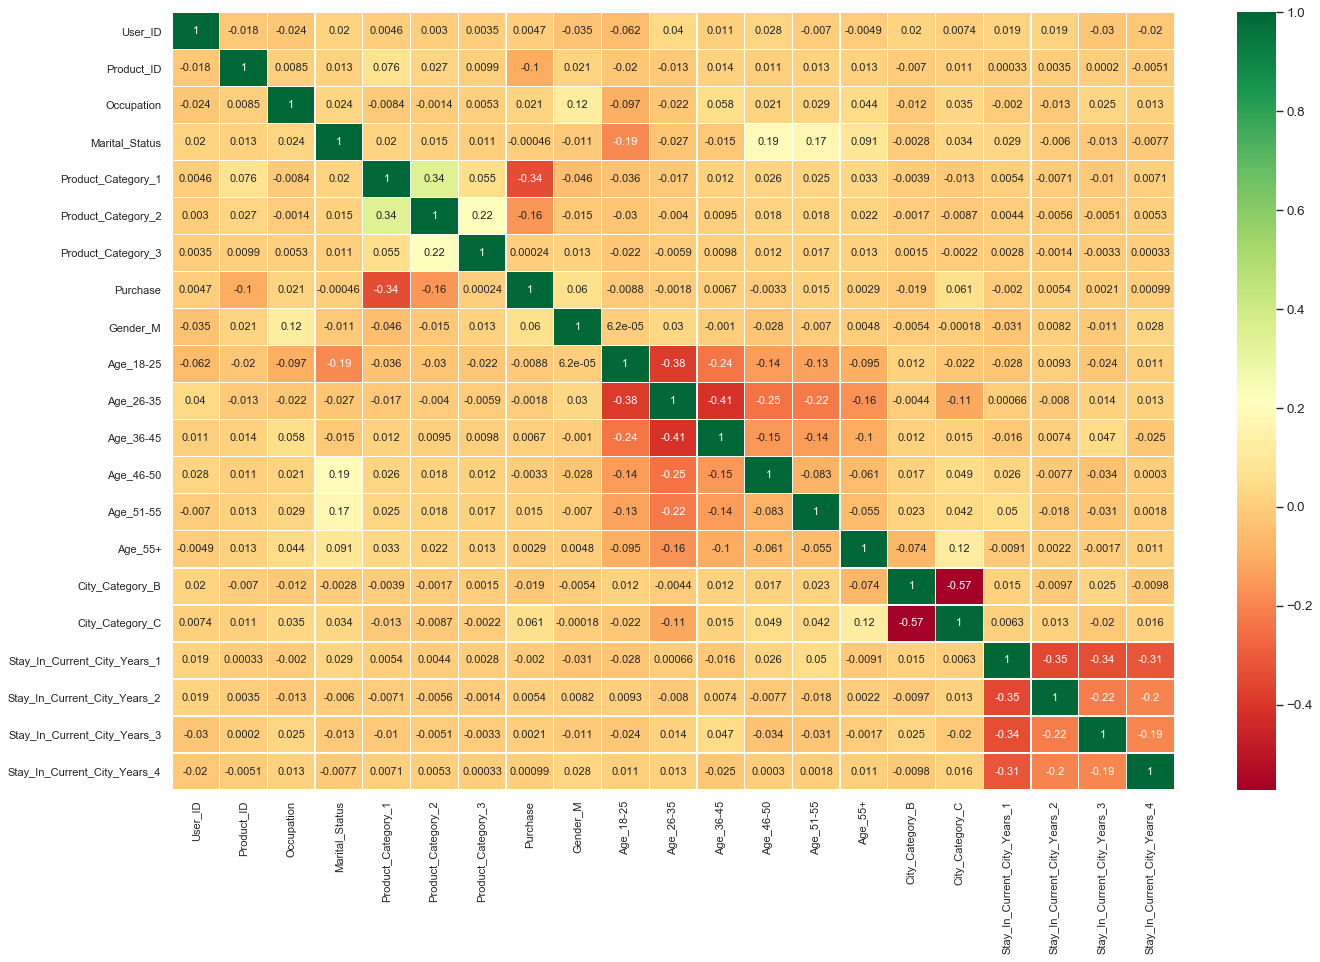

In [39]:
#Lets do a correlation plot for entire dataframe
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(18,12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

We can see negative correlation of Purchase with product category 1

In [40]:
# Segregating train and test from df
train=df[:data.shape[0]]
test1=df[data.shape[0]:]

In [41]:
train.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,...,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,69042,10,0,3,6,14,8370.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,248942,10,0,1,6,14,15200.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,87842,10,0,12,14,17,1422.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,85442,10,0,12,14,17,1057.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,285442,16,0,8,2,17,7969.0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [42]:
test1.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,...,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000004,128942,7,1,1,11,12,NaN,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1000009,113442,17,0,3,5,12,NaN,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1000010,288442,1,1,5,14,12,NaN,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1000010,145342,1,1,4,9,12,NaN,0,0,...,1,0,0,0,1,0,0,0,0,1
4,1000011,53842,1,0,4,5,12,NaN,0,0,...,0,0,0,0,0,1,1,0,0,0


**Drop target column(Purchase) from train and test**

In [43]:
train.drop('Purchase', axis = 1, inplace = True)
test1.drop('Purchase', axis = 1, inplace = True)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.values, data['Purchase'].values, test_size = 0.3, random_state = 4)

In [45]:
# Scale input values
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test)
test1_sc = sc_x.transform(test1)

**We will use multiple models to predict Puchase prices**

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [52]:
reg=LinearRegression()

In [53]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred=reg.predict(X_test)

In [57]:
print(r2_score(y_test,y_pred))

0.13283682084555715


In [78]:
mean_squared_error(y_test,y_pred)

21962534.170823433

**Ridge and Lasso Regression**

In [68]:
! pip install yellowbrick

In [69]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [73]:
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

plt.rcParams['figure.figsize'] = (8,5)

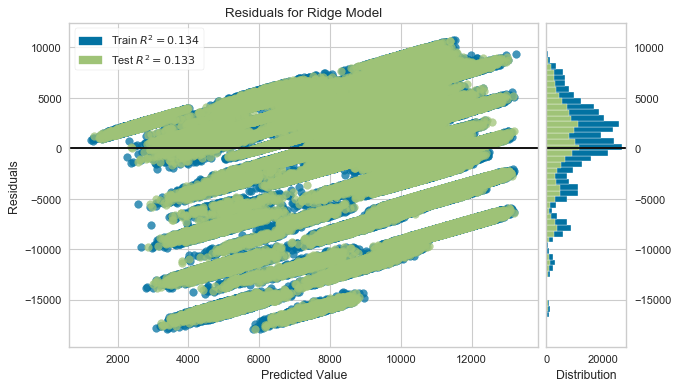

In [74]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()

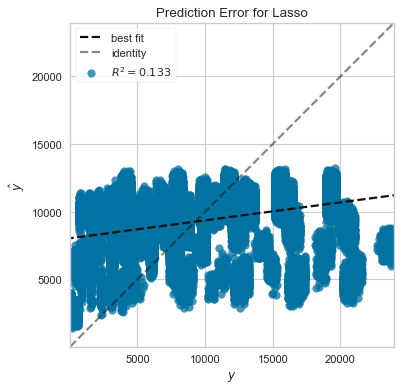

In [76]:
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()

**Model using Decision Tree Regressor**

In [58]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [59]:
reg_1=DecisionTreeRegressor()

In [60]:
reg_1.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
y_pred1=reg_1.predict(X_test)

In [62]:
print(r2_score(y_test,y_pred1))

0.42524599478275305


In [79]:
mean_squared_error(y_test,y_pred1)

14556723.328255191

**Model using Random Forest Regressor**

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
reg_2= RandomForestRegressor()

In [65]:
reg_2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
y_pred2=reg_2.predict(X_test)

In [67]:
print(r2_score(y_test,y_pred2))

0.7010265590622162


In [80]:
mean_squared_error(y_test,y_pred2)

7572063.217867886

**Based on above models it can be observed that Random Forest Regressor gives better performance with comparison to other machine learning models namely linear regression and Decision tree regressor**

**Thus the proposed model will predict the customer purchase on Black Friday and give the retailer insight into customer choice of products. This will result in a discount based on customer-centric choices thus increasing the profit to the retailer as well as the customer.**